In [201]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [202]:
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn import tree
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# To create the interactive components
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


In [203]:
df = pd.read_csv("https://raw.githubusercontent.com/p-sama/Glass-Classification/master/glass.csv")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [204]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [205]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [206]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

# EDA

# Scatterplot:

<AxesSubplot:xlabel='Type', ylabel='Fe'>

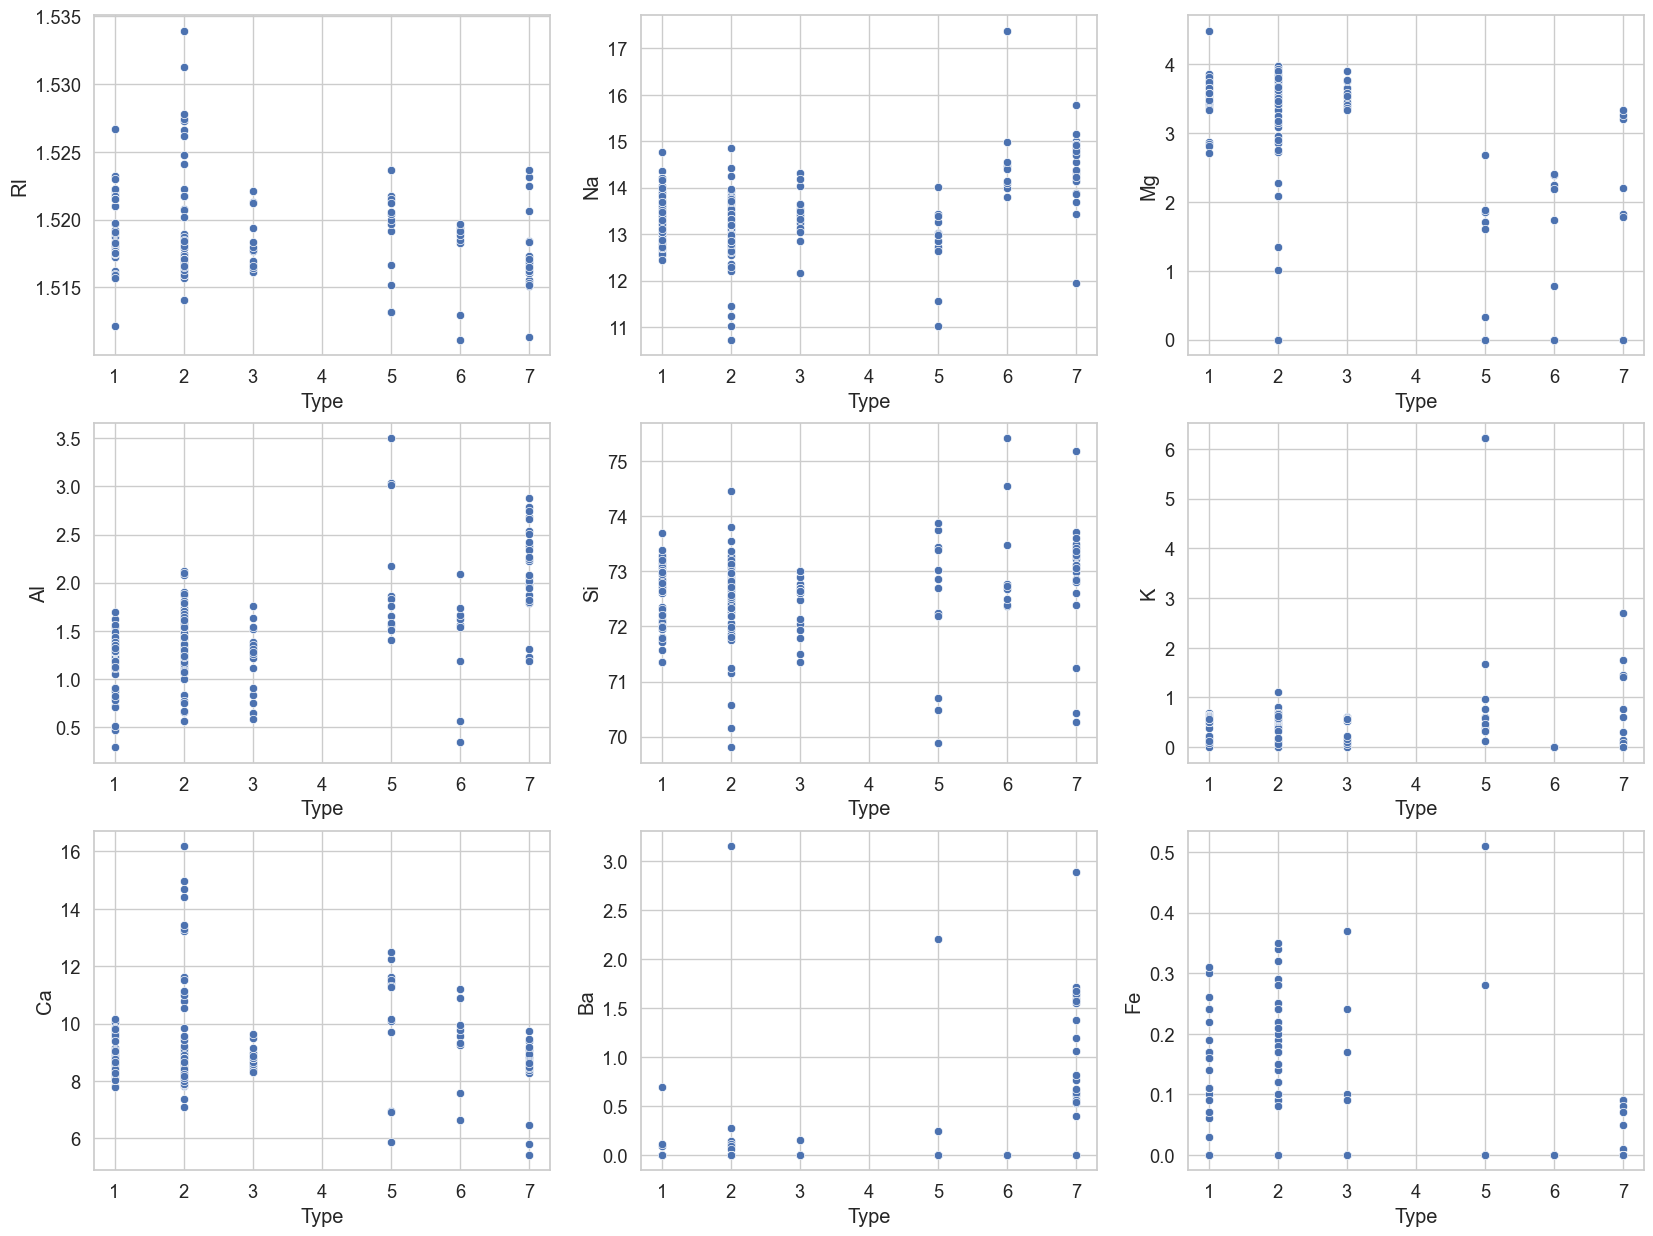

In [207]:
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (20,15))
plt.subplot(3,3,1)
sns.scatterplot(x = "Type", y = "RI", data = df)
plt.subplot(3,3,2)
sns.scatterplot(x = "Type", y = "Na", data = df)
plt.subplot(3,3,3)
sns.scatterplot(x = "Type", y = "Mg", data = df)
plt.subplot(3,3,4)
sns.scatterplot(x = "Type", y = "Al", data = df)
plt.subplot(3,3,5)
sns.scatterplot(x = "Type", y = "Si", data = df)
plt.subplot(3,3,6)
sns.scatterplot(x = "Type", y = "K", data = df)
plt.subplot(3,3,7)
sns.scatterplot(x = "Type", y = "Ca", data = df)
plt.subplot(3,3,8)
sns.scatterplot(x = "Type", y = "Ba", data = df)
plt.subplot(3,3,9)
sns.scatterplot(x = "Type", y = "Fe", data = df)



In [208]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


<AxesSubplot:>

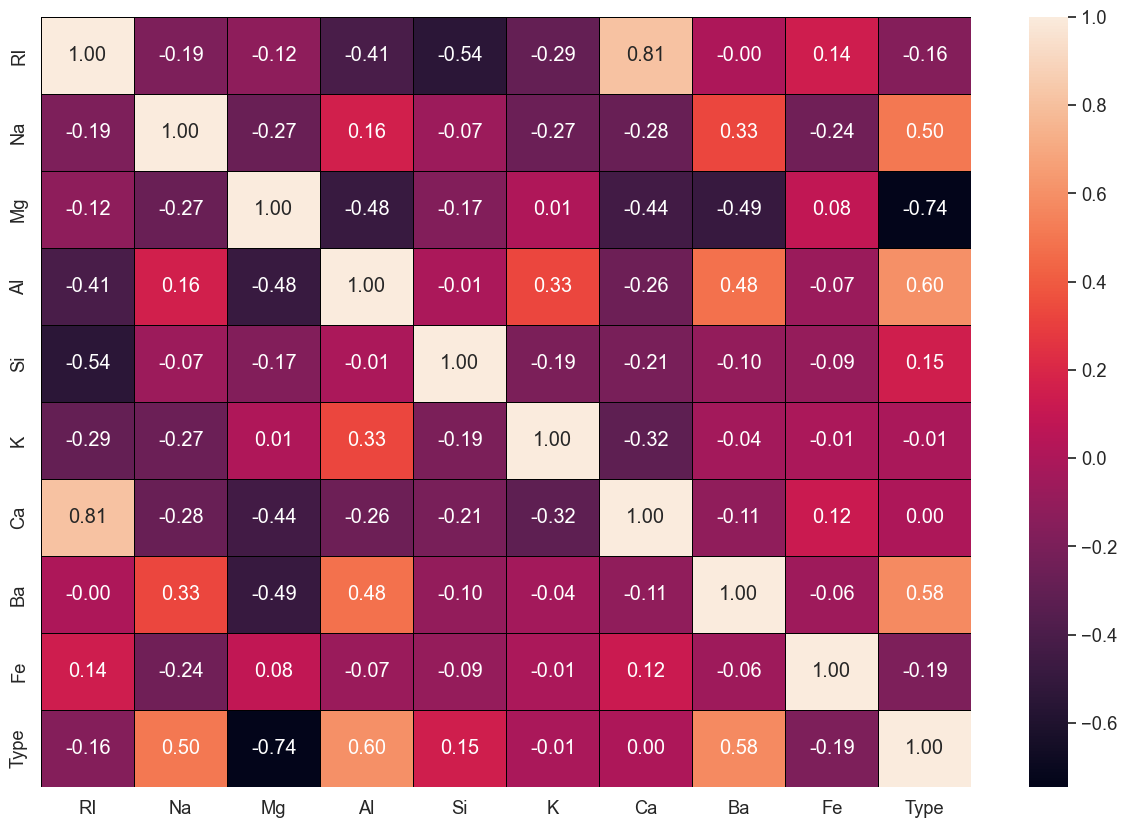

In [209]:
plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),linecolor = 'black',annot=True, linewidth=.5, fmt = ".2f")

In [210]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [212]:
df.shape

(214, 10)

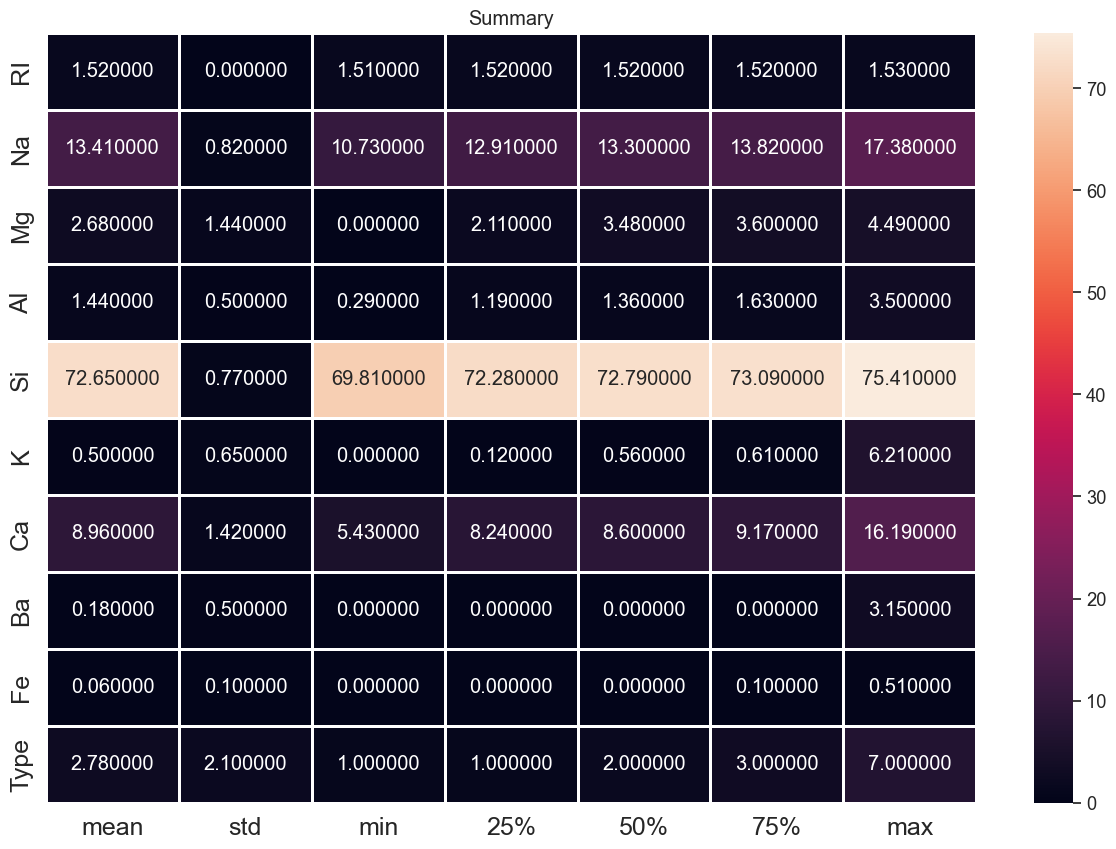

In [213]:
plt.figure(figsize=(15,10))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth = 2, annot=True, fmt = "f")
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title("Summary")
plt.show()

In [214]:
df['Type'].nunique()

6

In [215]:
df['RI'].nunique()

178

In [216]:
import matplotlib.pyplot as plt
%matplotlib inline

# OUTLIERS CHECKING

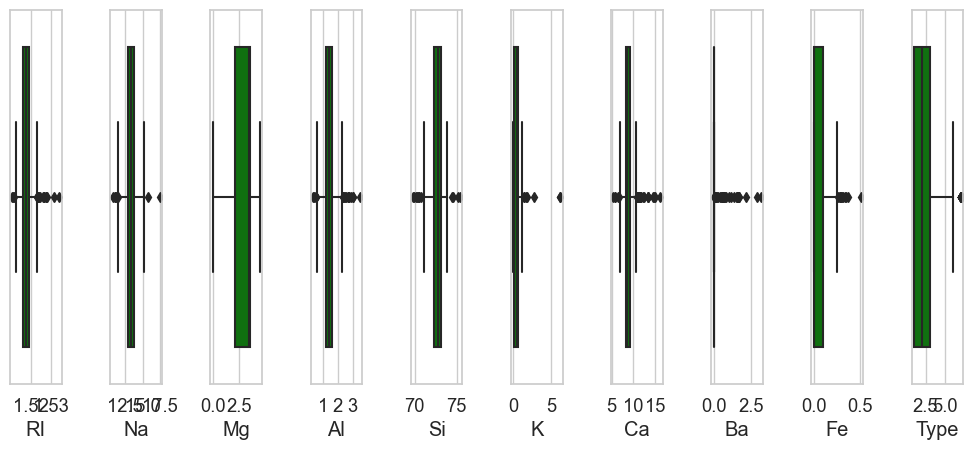

In [217]:
collist = df.columns.values
ncol = 30
nrows = 20
plt.figure(figsize = (ncol, 3*ncol))
for i in range(0, len(collist)):
    plt.subplot(nrows, ncol, i+1)
    sns.boxplot(df[collist[i]], color = "green", orient = "v")
    plt.tight_layout()

In [218]:
df.skew()

RI      1.625431
Na      0.454181
Mg     -1.152559
Al      0.907290
Si     -0.730447
K       6.551648
Ca      2.047054
Ba      3.416425
Fe      1.754327
Type    1.114915
dtype: float64

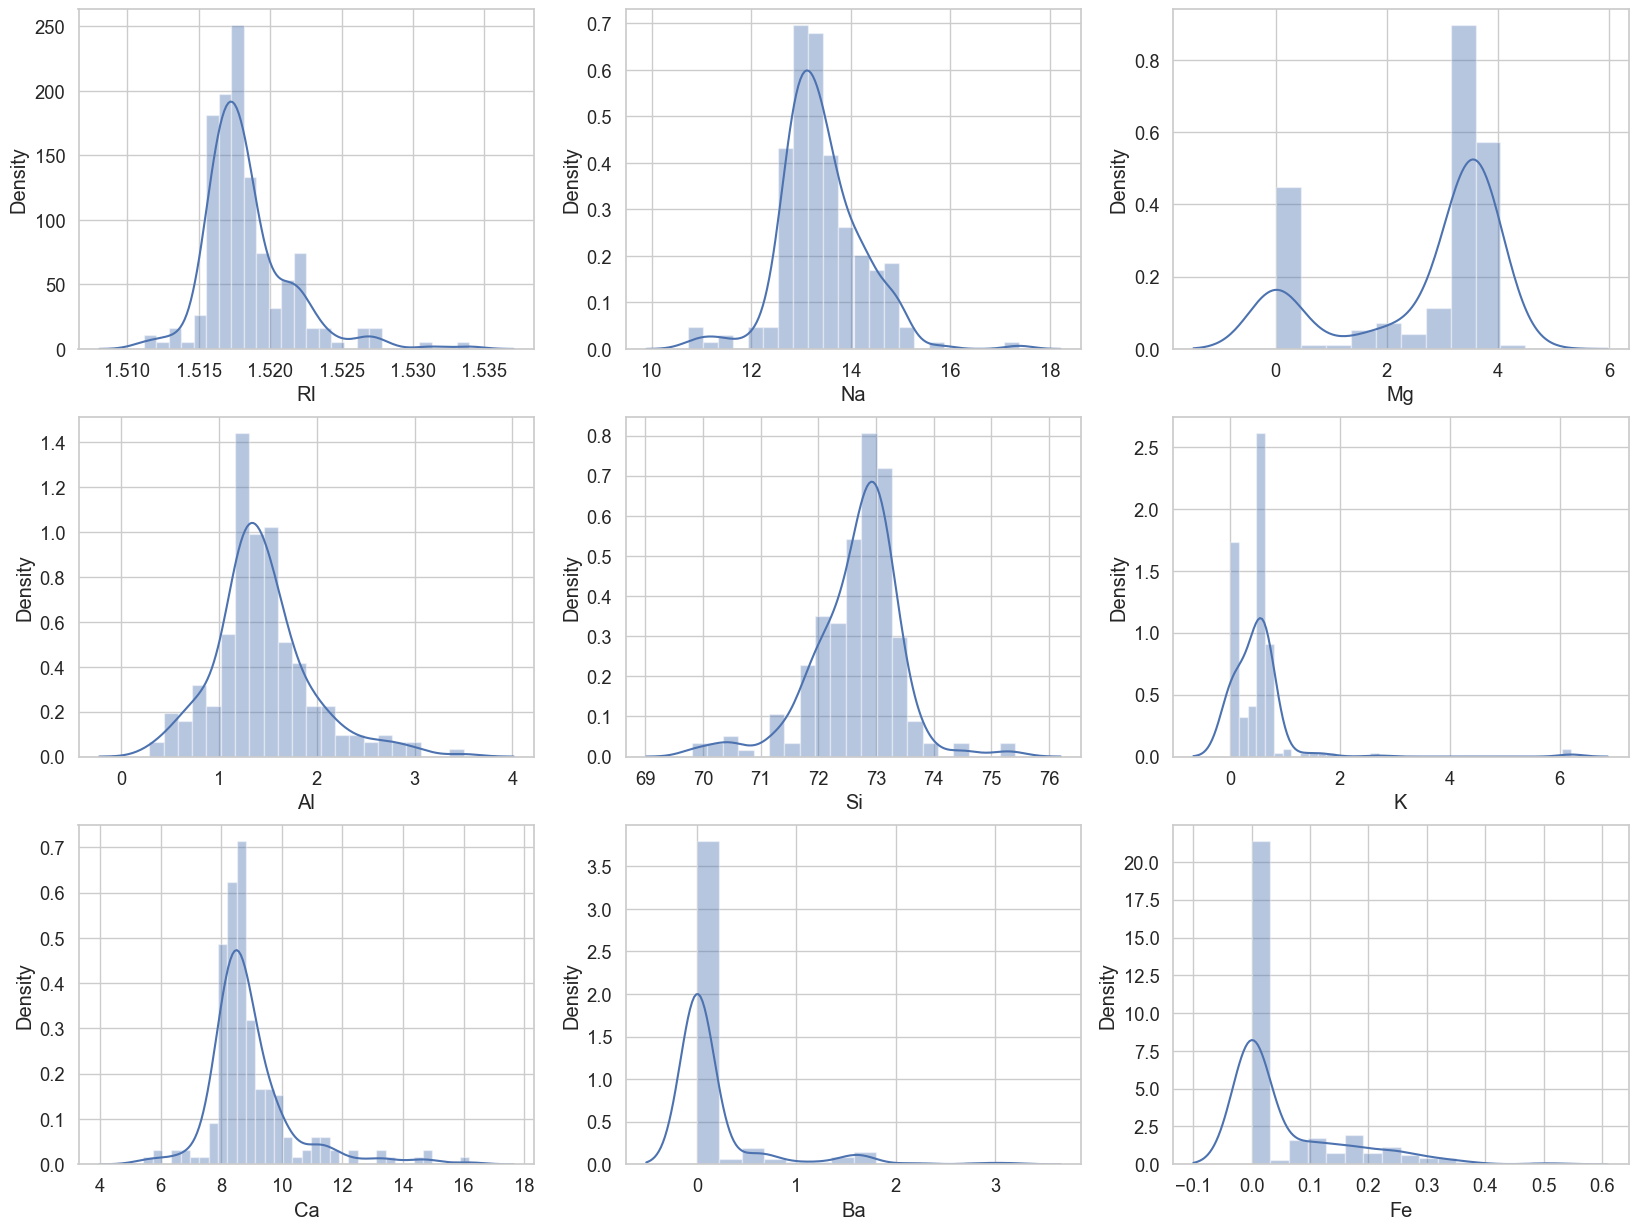

In [219]:
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (20,15))
plt.subplot(3,3,1)
sns.distplot(df ["RI"])
plt.subplot(3,3,2)
sns.distplot(df ["Na"])
plt.subplot(3,3,3)
sns.distplot(df ["Mg"])
plt.subplot(3,3,4)
sns.distplot(df ["Al"])
plt.subplot(3,3,5)
sns.distplot(df ["Si"])
plt.subplot(3,3,6)
sns.distplot(df ["K"])
plt.subplot(3,3,7)
sns.distplot(df ["Ca"])
plt.subplot(3,3,8)
sns.distplot(df ["Ba"])
plt.subplot(3,3,9)
sns.distplot(df ["Fe"])
plt.show()

# Removing Outliers

In [264]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [265]:
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [266]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [267]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(x))
z.shape

(214, 9)

In [268]:
threshold = 3
print(np.where(z>3))

(array([105, 106, 106, 106, 106, 106, 107, 107, 107, 110, 111, 112, 112,
       131, 145, 162, 163, 163, 163, 171, 171, 172, 172, 174, 184, 184,
       188, 189, 201, 201, 203, 207, 213], dtype=int64), array([6, 0, 1, 4, 6, 7, 0, 4, 6, 6, 6, 0, 6, 6, 8, 8, 3, 4, 7, 3, 5, 3,
       5, 8, 1, 4, 4, 7, 4, 5, 7, 7, 7], dtype=int64))


In [269]:
df1 = df[(z<3).all(axis = 1)]
print(df.shape)
print(df1.shape)

(214, 10)
(194, 10)


In [270]:
x.shape

(214, 9)

In [271]:
x = x[(z<3).all(axis = 1)]
x.shape

(194, 9)

In [272]:
y = y[(z<3).all(axis = 1)]
y.shape

(194,)

# Percentage Data Loss

In [273]:
loss_percent = (214-194)/214*100
loss_percent

9.345794392523365

# Transforming Data to remove Skewness

In [274]:
#importing power transformer:
from sklearn.preprocessing import power_transform

In [275]:
x = power_transform(x, method = "yeo-johnson")
x

array([[ 0.00000000e+00,  3.75144846e-01,  2.29506682e+00, ...,
         1.11819938e-03, -4.29499500e-01, -6.77737203e-01],
       [ 0.00000000e+00,  7.32539190e-01,  5.87338331e-01, ...,
        -1.05715663e+00, -4.29499500e-01, -6.77737203e-01],
       [ 0.00000000e+00,  2.14037622e-01,  5.07711174e-01, ...,
        -1.11977966e+00, -4.29499500e-01, -6.77737203e-01],
       ...,
       [ 0.00000000e+00,  2.08782892e+00, -1.94767390e+00, ...,
        -3.81688285e-01,  2.49873753e+00, -6.77737203e-01],
       [ 0.00000000e+00,  1.37327598e+00, -1.94767390e+00, ...,
        -3.36777926e-01,  2.49875343e+00, -6.77737203e-01],
       [ 0.00000000e+00,  1.39968197e+00, -1.94767390e+00, ...,
        -2.92174639e-01,  2.49873007e+00, -6.77737203e-01]])

In [276]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 0.00000000e+00,  3.75144846e-01,  2.29506682e+00, ...,
         1.11819938e-03, -4.29499500e-01, -6.77737203e-01],
       [ 0.00000000e+00,  7.32539190e-01,  5.87338331e-01, ...,
        -1.05715663e+00, -4.29499500e-01, -6.77737203e-01],
       [ 0.00000000e+00,  2.14037622e-01,  5.07711174e-01, ...,
        -1.11977966e+00, -4.29499500e-01, -6.77737203e-01],
       ...,
       [ 0.00000000e+00,  2.08782892e+00, -1.94767390e+00, ...,
        -3.81688285e-01,  2.49873753e+00, -6.77737203e-01],
       [ 0.00000000e+00,  1.37327598e+00, -1.94767390e+00, ...,
        -3.36777926e-01,  2.49875343e+00, -6.77737203e-01],
       [ 0.00000000e+00,  1.39968197e+00, -1.94767390e+00, ...,
        -2.92174639e-01,  2.49873007e+00, -6.77737203e-01]])

In [277]:
y.value_counts()

1    70
2    68
7    23
3    16
5     9
6     8
Name: Type, dtype: int64

In [278]:
!pip install imbalanced-learn
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

SM = SMOTE()
x,y = SM.fit_resample(x,y)

In [279]:
y.value_counts()

1    70
2    70
3    70
5    70
6    70
7    70
Name: Type, dtype: int64

In [280]:
x.shape

(420, 9)

# Binary Classification Model

In [281]:
from sklearn.model_selection import train_test_split


In [282]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,f1_score, precision_score, recall_score, roc_curve, auc, accuracy_score
lr=LogisticRegression()
lr.fit(x_train,y_train)


LogisticRegression()

# Splitting the DataFrame

In [239]:
for i in range(0,1000):
    x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=i, test_size = 0.20)

In [283]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,f1_score, precision_score, recall_score, roc_curve, auc, accuracy_score
lr=LogisticRegression()
lr.fit(x_train,y_train)


LogisticRegression()

In [284]:
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
acc=accuracy_score(y_test,predlr)
print('testing accuracy',acc,'random_state',i)

testing accuracy 0.6785714285714286 random_state 999


In [285]:
# checking best accuracy:
print("Best accuracy is",acc,'random_state',i)

Best accuracy is 0.6785714285714286 random_state 999


In [286]:
from sklearn.neighbors import KNeighborsClassifier
KNN= KNeighborsClassifier()
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [287]:
# checking testing accuracy:
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
predKNN=KNN.predict(x_test)
acc=accuracy_score(y_test,predKNN)
print('testing accuracy',acc,'random_state',i)

testing accuracy 0.7976190476190477 random_state 999


In [288]:
# checking best accuracy:
print("Best accuracy is",acc,'random_state',i)

Best accuracy is 0.7976190476190477 random_state 999


In [289]:
print(classification_report(y_test,pred_test))

ValueError: Found input variables with inconsistent numbers of samples: [84, 105]

In [247]:
pred_lr = lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test, pred_lr)
for j in range(2,10):
    lsscore = cross_val_score(lr, x, cv=j)
    print(lsscore)
    lsc = lsscore.mean()
    print("Ar cv:",j)
    print("cross val score is:", lsc* 100)
    print("\n")

[nan nan]
Ar cv: 2
cross val score is: nan


[nan nan nan]
Ar cv: 3
cross val score is: nan


[nan nan nan nan]
Ar cv: 4
cross val score is: nan


[nan nan nan nan nan]
Ar cv: 5
cross val score is: nan


[nan nan nan nan nan nan]
Ar cv: 6
cross val score is: nan


[nan nan nan nan nan nan nan]
Ar cv: 7
cross val score is: nan


[nan nan nan nan nan nan nan nan]
Ar cv: 8
cross val score is: nan


[nan nan nan nan nan nan nan nan nan]
Ar cv: 9
cross val score is: nan




In [290]:
from sklearn.model_selection import cross_val_score
#validation accuracy
cr_1=cross_val_score(lr,x,y,cv=5)
print("Cross Validation Score of LogisticRegression model :",cr_1.mean())

Cross Validation Score of LogisticRegression model : 0.7714285714285714


In [291]:
from sklearn.model_selection import cross_val_score
#validation accuracy
cr_2=cross_val_score(KNN,x,y,cv=5)
print("Cross Validation Score of KNeighborsClassifier model :",cr_2.mean())

Cross Validation Score of KNeighborsClassifier model : 0.8285714285714285
